In [259]:
# Import SparkConf class into program
from pyspark import SparkConf
from pyspark import SparkContext # Spark
from pyspark.sql import SparkSession # Spark SQL
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType
from pyspark.sql.types import *
from pyspark.sql.functions import concat , lit, col
from pyspark.sql.types import IntegerType
import matplotlib.pyplot as plt
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
# local[*]: run Spark in local mode with as many working processors as logical cores on your machine
# If we want Spark to run locally with 'k' worker threads, we can specify as "local[k]".
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "My spark assignment "
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)


In [260]:
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
sc = spark.sparkContext
sc.setLogLevel('ERROR')               #### spark initialization

### Section 1.1

######  1.1.1.1  - 1.1.1.3 Loading data sets 

In [261]:
###### Load datasets
df_crash= spark.sparkContext.textFile("2015_DATA_SA_Crash.csv,2016_DATA_SA_Crash.csv,2017_DATA_SA_Crash.csv,2018_DATA_SA_Crash.csv,2019_DATA_SA_Crash.csv")

df_units = spark.sparkContext.textFile("2015_DATA_SA_Units.csv,2016_DATA_SA_Units.csv,2017_DATA_SA_Units.csv,2018_DATA_SA_Units.csv,2019_DATA_SA_Units.csv")

######  1.1.1.4

In [262]:
df_crash.take(10)    # display top 10 records



['"REPORT_ID","Stats Area","Suburb","Postcode","LGA Name","Total Units","Total Cas","Total Fats","Total SI","Total MI","Year","Month","Day","Time","Area Speed","Position Type","Horizontal Align","Vertical Align","Other Feat","Road Surface","Moisture Cond","Weather Cond","DayNight","Crash Type","Unit Resp","Entity Code","CSEF Severity","Traffic Ctrls","DUI Involved","Drugs Involved","ACCLOC_X","ACCLOC_Y","UNIQUE_LOC"',
 '"2015-1-21/08/2019","2 Metropolitan","ELIZABETH VALE","5112","CITY OF PLAYFORD.",2,1,0,0,1,2015,"January","Wednesday","01:00 pm","060","T-Junction","Straight road","Level","Not Applicable","Sealed","Dry","Not Raining","Daylight","Side Swipe","01","Driver Rider","2: MI","No Control","","",1335254.54,1690056.88,"13352551690057"',
 '"2015-2-21/08/2019","2 Metropolitan","SALISBURY","5108","CITY OF SALISBURY",2,1,0,0,1,2015,"February","Tuesday","03:38 pm","060","Cross Road","Straight road","Level","Not Applicable","Sealed","Dry","Not Raining","Daylight","Rear End","01","Driv

In [263]:

df_units.take(10)

['"REPORT_ID","Unit No","No Of Cas","Veh Reg State","Unit Type","Veh Year","Direction Of Travel","Sex","Age","Lic State","Licence Class","Licence Type","Towing","Unit Movement","Number Occupants","Postcode","Rollover","Fire"',
 '"2015-1-21/08/2019","01",0,"SA","RIGID TRUCK LGE GE 4.5T","1999","North East","Male","052","SA","HRR ","Full","Not Towing","Swerving","001","5109",,',
 '"2015-1-21/08/2019","02",1,"SA","Motor Cars - Sedan","2009","North East","Female","057","SA","C ","Full","Not Towing","Straight Ahead","002","5125",,',
 '"2015-2-21/08/2019","01",0,"SA","Motor Cars - Sedan","2009","South East","Male","020","SA","MR","Provisional 1 ","Not Towing","Straight Ahead","001","5110",,',
 '"2015-2-21/08/2019","02",1,"SA","Motor Cars - Sedan","1994","South East","Female","021","SA","C ","Full","Not Towing","Stopped on Carriageway","001","5096",,',
 '"2015-3-21/08/2019","01",0,"SA","Motor Cars - Sedan","2008","North East","Male","023","SA","C ","Full","Not Towing","Straight Ahead","001","

In [264]:
header_1 = df_crash.first()
df_crash_new = df_crash.filter(lambda x: x != header_1)
                                                                ### remove headers
header_2 = df_units.first()
df_units_new = df_crash.filter(lambda x: x != header_2)


In [265]:
header_2

'"REPORT_ID","Unit No","No Of Cas","Veh Reg State","Unit Type","Veh Year","Direction Of Travel","Sex","Age","Lic State","Licence Class","Licence Type","Towing","Unit Movement","Number Occupants","Postcode","Rollover","Fire"'

In [266]:
#df_crash_new.count()


#df_crash_new.take(10)

In [267]:
df_units_new.count()


#df_units_new.take(10)

72011

#####  1.2.1

In [268]:
print('Default partitions: ',df_crash_new.getNumPartitions())         ##### print partitions

Default partitions:  5


In [269]:
print('Default partitions: ',df_units_new.getNumPartitions())          ### print partitions 

Default partitions:  5


##### One partition for each file by default

#### 1.2 

In [270]:
df_units_new = df_units.filter(lambda x: x != header_2).map(lambda x: x.split(',')).map(lambda x: (x[9],x[0:8]+x[10:]))
df_units_new.take(5)                           #### remove header and split ased on columns  and slicing to make sure to get all columns except the 9th column 

[('"SA"',
  ['"2015-1-21/08/2019"',
   '"01"',
   '0',
   '"SA"',
   '"RIGID TRUCK LGE GE 4.5T"',
   '"1999"',
   '"North East"',
   '"Male"',
   '"HRR "',
   '"Full"',
   '"Not Towing"',
   '"Swerving"',
   '"001"',
   '"5109"',
   '',
   '']),
 ('"SA"',
  ['"2015-1-21/08/2019"',
   '"02"',
   '1',
   '"SA"',
   '"Motor Cars - Sedan"',
   '"2009"',
   '"North East"',
   '"Female"',
   '"C "',
   '"Full"',
   '"Not Towing"',
   '"Straight Ahead"',
   '"002"',
   '"5125"',
   '',
   '']),
 ('"SA"',
  ['"2015-2-21/08/2019"',
   '"01"',
   '0',
   '"SA"',
   '"Motor Cars - Sedan"',
   '"2009"',
   '"South East"',
   '"Male"',
   '"MR"',
   '"Provisional 1 "',
   '"Not Towing"',
   '"Straight Ahead"',
   '"001"',
   '"5110"',
   '',
   '']),
 ('"SA"',
  ['"2015-2-21/08/2019"',
   '"02"',
   '1',
   '"SA"',
   '"Motor Cars - Sedan"',
   '"1994"',
   '"South East"',
   '"Female"',
   '"C "',
   '"Full"',
   '"Not Towing"',
   '"Stopped on Carriageway"',
   '"001"',
   '"5096"',
   '',
   '']

In [271]:

def SA_partition(key):
    if key == '"SA"':
        return 0
    else:                             #### user defined function to partition , where 0 index puts all records of "SA" FOR FIRST PARTITITON
                                      ### REST Go in partiton 1
        return 1
    


In [272]:
#no_of_partitions = 2

In [273]:
custom_partitioned_rdd = df_units_new.partitionBy(2, SA_partition )

In [274]:
custom_partitioned_rdd.take(5)

[('"SA"',
  ['"2015-1-21/08/2019"',
   '"01"',
   '0',
   '"SA"',
   '"RIGID TRUCK LGE GE 4.5T"',
   '"1999"',
   '"North East"',
   '"Male"',
   '"HRR "',
   '"Full"',
   '"Not Towing"',
   '"Swerving"',
   '"001"',
   '"5109"',
   '',
   '']),
 ('"SA"',
  ['"2015-1-21/08/2019"',
   '"02"',
   '1',
   '"SA"',
   '"Motor Cars - Sedan"',
   '"2009"',
   '"North East"',
   '"Female"',
   '"C "',
   '"Full"',
   '"Not Towing"',
   '"Straight Ahead"',
   '"002"',
   '"5125"',
   '',
   '']),
 ('"SA"',
  ['"2015-2-21/08/2019"',
   '"01"',
   '0',
   '"SA"',
   '"Motor Cars - Sedan"',
   '"2009"',
   '"South East"',
   '"Male"',
   '"MR"',
   '"Provisional 1 "',
   '"Not Towing"',
   '"Straight Ahead"',
   '"001"',
   '"5110"',
   '',
   '']),
 ('"SA"',
  ['"2015-2-21/08/2019"',
   '"02"',
   '1',
   '"SA"',
   '"Motor Cars - Sedan"',
   '"1994"',
   '"South East"',
   '"Female"',
   '"C "',
   '"Full"',
   '"Not Towing"',
   '"Stopped on Carriageway"',
   '"001"',
   '"5096"',
   '',
   '']

In [275]:
print('no of partitions: ',custom_partitioned_rdd.getNumPartitions())

no of partitions:  2


In [276]:
from pyspark.rdd import RDD

#A Function to print the data items in each RDD
#Same function is used to print out the data items of a DataFrame later
def print_partitions(data):
    if isinstance(data, RDD):
        numPartitions = data.getNumPartitions()
        partitions = data.glom().collect()
    else:
        numPartitions = data.rdd.getNumPartitions()
        partitions = data.rdd.glom().collect()
    
    print(f"####### NUMBER OF PARTITIONS: {numPartitions}")
    for index, partition in enumerate(partitions):
        # show partition if it is not empty
        if len(partition) > 0:
            print(f"Partition {index}: {len(partition)} records")

In [277]:
print_partitions(custom_partitioned_rdd)

####### NUMBER OF PARTITIONS: 2
Partition 0: 109684 records
Partition 1: 44170 records


###  partition 0 has more records so more skewed 

### 1.3

##### 1.3.1

In [278]:
df_temp_query = df_units.filter(lambda x: x != header_2).map(lambda x: x.split(','))

In [279]:
def filter_func(x):
    x = x.replace('"', '')
    x = x.replace("'", '')
    return int(x)

In [280]:
integer_udf = udf(filter_func,IntegerType())


In [281]:
df_temp_query = df_temp_query.filter(lambda x: x[7] == '"Male"')
##


###### 1.3.2 

In [282]:
df_required  = df_units_new.map(lambda x: (x[3],x[4],x[5]))


#### 2.1.1

In [47]:
path_1 = ['2015_DATA_SA_Crash.csv','2016_DATA_SA_Crash.csv','2017_DATA_SA_Crash.csv','2018_DATA_SA_Crash.csv','2019_DATA_SA_Crash.csv']
d_frame_crash = spark.read.option("header", "true").csv(path_1)                  #### load  all csv files by passing a list of paths of files

In [48]:
d_frame_crash.printSchema()

root
 |-- REPORT_ID: string (nullable = true)
 |-- Stats Area: string (nullable = true)
 |-- Suburb: string (nullable = true)
 |-- Postcode: string (nullable = true)
 |-- LGA Name: string (nullable = true)
 |-- Total Units: string (nullable = true)
 |-- Total Cas: string (nullable = true)
 |-- Total Fats: string (nullable = true)
 |-- Total SI: string (nullable = true)
 |-- Total MI: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Day: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Area Speed: string (nullable = true)
 |-- Position Type: string (nullable = true)
 |-- Horizontal Align: string (nullable = true)
 |-- Vertical Align: string (nullable = true)
 |-- Other Feat: string (nullable = true)
 |-- Road Surface: string (nullable = true)
 |-- Moisture Cond: string (nullable = true)
 |-- Weather Cond: string (nullable = true)
 |-- DayNight: string (nullable = true)
 |-- Crash Type: string (nullable = true)
 |-- U

In [51]:
#d_frame_crash.show(10)


+------------------+--------------+--------------+--------+--------------------+-----------+---------+----------+--------+--------+----+--------+---------+--------+----------+-------------+-----------------+--------------+--------------+------------+-------------+------------+--------+------------------+---------+------------+-------------+---------------+------------+--------------+----------+----------+--------------+
|         REPORT_ID|    Stats Area|        Suburb|Postcode|            LGA Name|Total Units|Total Cas|Total Fats|Total SI|Total MI|Year|   Month|      Day|    Time|Area Speed|Position Type| Horizontal Align|Vertical Align|    Other Feat|Road Surface|Moisture Cond|Weather Cond|DayNight|        Crash Type|Unit Resp| Entity Code|CSEF Severity|  Traffic Ctrls|DUI Involved|Drugs Involved|  ACCLOC_X|  ACCLOC_Y|    UNIQUE_LOC|
+------------------+--------------+--------------+--------+--------------------+-----------+---------+----------+--------+--------+----+--------+-------

In [49]:
path_2 = ['2015_DATA_SA_Units.csv','2016_DATA_SA_Units.csv','2017_DATA_SA_Units.csv','2018_DATA_SA_Units.csv','2019_DATA_SA_Units.csv']
d_frame_units = spark.read.option("header", "true").csv(path_2)

In [50]:
d_frame_units.printSchema()         #### print schema

root
 |-- REPORT_ID: string (nullable = true)
 |-- Unit No: string (nullable = true)
 |-- No Of Cas: string (nullable = true)
 |-- Veh Reg State: string (nullable = true)
 |-- Unit Type: string (nullable = true)
 |-- Veh Year: string (nullable = true)
 |-- Direction Of Travel: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Lic State: string (nullable = true)
 |-- Licence Class: string (nullable = true)
 |-- Licence Type: string (nullable = true)
 |-- Towing: string (nullable = true)
 |-- Unit Movement: string (nullable = true)
 |-- Number Occupants: string (nullable = true)
 |-- Postcode: string (nullable = true)
 |-- Rollover: string (nullable = true)
 |-- Fire: string (nullable = true)



In [52]:
d_frame_units.show(10)


+-----------------+-------+---------+-------------+--------------------+--------+-------------------+-------+---+---------+-------------+-------------+----------+---------------+----------------+--------+--------+----+
|        REPORT_ID|Unit No|No Of Cas|Veh Reg State|           Unit Type|Veh Year|Direction Of Travel|    Sex|Age|Lic State|Licence Class| Licence Type|    Towing|  Unit Movement|Number Occupants|Postcode|Rollover|Fire|
+-----------------+-------+---------+-------------+--------------------+--------+-------------------+-------+---+---------+-------------+-------------+----------+---------------+----------------+--------+--------+----+
|2016-1-15/08/2019|     01|        0|           SA|             OMNIBUS|    2011|              North|   Male|056|       SA|           HR|         Full|Not Towing| Straight Ahead|             010|    5121|    null|null|
|2016-1-15/08/2019|     02|        1|         null|  Pedestrian on Road|    null|               East|   Male|072|     null| 

#### 2.2 .1  

In [159]:
d_frame_crash.select('*').filter(d_frame_crash['Suburb'] == "ADELAIDE").filter(d_frame_crash['Total Cas'] > 3).show()   ### subset data tO include only ADELAIDE

+--------------------+----------+--------+--------+----------------+-----------+---------+----------+--------+--------+----+--------+--------+--------+----------+-------------+----------------+--------------+--------------------+------------+-------------+------------+--------+--------------+---------+------------+-------------+---------------+------------+--------------+----------+----------+--------------+
|           REPORT_ID|Stats Area|  Suburb|Postcode|        LGA Name|Total Units|Total Cas|Total Fats|Total SI|Total MI|Year|   Month|     Day|    Time|Area Speed|Position Type|Horizontal Align|Vertical Align|          Other Feat|Road Surface|Moisture Cond|Weather Cond|DayNight|    Crash Type|Unit Resp| Entity Code|CSEF Severity|  Traffic Ctrls|DUI Involved|Drugs Involved|  ACCLOC_X|  ACCLOC_Y|    UNIQUE_LOC|
+--------------------+----------+--------+--------+----------------+-----------+---------+----------+--------+--------+----+--------+--------+--------+----------+-------------+

In [158]:
d_frame_crash.select('*').withColumn('Total Cas',F.col('Total Cas').cast(IntegerType())).sort('Total Cas', ascending=False).show(10)


####  Change column to integer and sort accordingly

+--------------------+--------------+---------------+--------+--------------------+-----------+---------+----------+--------+--------+----+--------+---------+--------+----------+-------------+--------------------+--------------+--------------+------------+-------------+------------+--------+-----------+---------+------------+-------------+---------------+------------+--------------+----------+----------+--------------+
|           REPORT_ID|    Stats Area|         Suburb|Postcode|            LGA Name|Total Units|Total Cas|Total Fats|Total SI|Total MI|Year|   Month|      Day|    Time|Area Speed|Position Type|    Horizontal Align|Vertical Align|    Other Feat|Road Surface|Moisture Cond|Weather Cond|DayNight| Crash Type|Unit Resp| Entity Code|CSEF Severity|  Traffic Ctrls|DUI Involved|Drugs Involved|  ACCLOC_X|  ACCLOC_Y|    UNIQUE_LOC|
+--------------------+--------------+---------------+--------+--------------------+-----------+---------+----------+--------+--------+----+--------+------

In [61]:
d_frame_crash.select('Crash Type','Total Fats').groupby('Crash Type').agg(F.sum('Total Fats')).show()  #### grooupby and aggregate using um to ignore null records

+--------------------+-----------------+
|          Crash Type|count(Total Fats)|
+--------------------+-----------------+
|           Roll Over|             3077|
|  Hit Object on Road|              278|
|      Hit Pedestrian|             1877|
|    Hit Fixed Object|            11384|
|               Other|              467|
|          Side Swipe|             7402|
|             Head On|             1283|
|  Hit Parked Vehicle|             5353|
|          Right Turn|             5651|
|            Rear End|            19717|
|          Hit Animal|             1096|
|Left Road - Out o...|              626|
|         Right Angle|            13795|
+--------------------+-----------------+



In [64]:
d_frame_crash.count()


72006

In [65]:
d_frame_units.count()

153854

In [67]:
join_frame = d_frame_crash.join(d_frame_units, d_frame_crash.REPORT_ID == d_frame_units.REPORT_ID,how='inner') 
#join_frame.show(20)           ##### inner join on dataframe

+--------------------+--------------+-----------------+--------+--------------------+-----------+---------+----------+--------+--------+----+---------+---------+--------+----------+-------------+-----------------+--------------+--------------------+------------+-------------+------------+--------+------------------+---------+------------+-------------+---------------+------------+--------------+----------+----------+--------------+--------------------+-------+---------+-------------+--------------------+--------+-------------------+-------+----+---------+-------------+------------+----------+--------------------+----------------+--------+--------+----+
|           REPORT_ID|    Stats Area|           Suburb|Postcode|            LGA Name|Total Units|Total Cas|Total Fats|Total SI|Total MI|Year|    Month|      Day|    Time|Area Speed|Position Type| Horizontal Align|Vertical Align|          Other Feat|Road Surface|Moisture Cond|Weather Cond|DayNight|        Crash Type|Unit Resp| Entity Code

In [183]:
join_frame.select('Suburb','Total Cas').filter(join_frame['Licence Type'] == "Unlicenced").groupby('Suburb').agg(F.sum('Total Cas')).show()


##### FILTER DATA BASED ON licence type and aggregate count to get total count

+-------------------+--------------+
|             Suburb|sum(Total Cas)|
+-------------------+--------------+
|      FLINDERS PARK|           8.0|
|       POOGINAGORIC|           1.0|
|     TEA TREE GULLY|           1.0|
|            HACKHAM|           3.0|
|   MEDINDIE GARDENS|           0.0|
|           WISANGER|           1.0|
|            CUMMINS|           0.0|
|       BASKET RANGE|           0.0|
|MURRAY BRIDGE SOUTH|           0.0|
|      GILLES PLAINS|           7.0|
|             HAWKER|           0.0|
|           BEAUFORT|           1.0|
|             MAGILL|           7.0|
|            ECHUNGA|           1.0|
|            CULTANA|           1.0|
|        EDWARDSTOWN|           6.0|
|        RISDON PARK|           1.0|
|          THORNGATE|           1.0|
|       ANDREWS FARM|          12.0|
|       TORRENSVILLE|           5.0|
+-------------------+--------------+
only showing top 20 rows



####  Question 2.3

#### 2.3.1

In [72]:
d_frame_crash.select('CSEF Severity').groupby('CSEF Severity').agg(F.count('CSEF Severity')).show()

+-------------+--------------------+
|CSEF Severity|count(CSEF Severity)|
+-------------+--------------------+
|     4: Fatal|                 451|
|        2: MI|               21881|
|       1: PDO|               46696|
|        3: SI|                2978|
+-------------+--------------------+



######  most common is property damage 

###### 2.3.2.a   When the driver is tested positive on drugs 

In [204]:
temp = d_frame_crash.filter(d_frame_crash['Drugs Involved'] == "Y").select('CSEF Severity').groupby('CSEF Severity').agg(F.count('CSEF Severity').alias('count_each_ondrugs'))

temp_total = d_frame_crash.select('CSEF Severity').count()


temp_1 = temp.withColumn('percentage',temp.count_each_ondrugs/ temp_total*100)
                                                                                      ### calculate percentage based subsetted data and  total records
temp_1.show()

+-------------+------------------+-------------------+
|CSEF Severity|count_each_ondrugs|         percentage|
+-------------+------------------+-------------------+
|     4: Fatal|                82|0.11387939893897732|
|        2: MI|               749|  1.040191095186512|
|       1: PDO|               176| 0.2444240757714635|
|        3: SI|               247| 0.3430269699747243|
+-------------+------------------+-------------------+



In [205]:
temp_total

72006

In [206]:
temp = d_frame_crash.filter(d_frame_crash['DUI Involved'] == "Y").select('CSEF Severity').groupby('CSEF Severity').agg(F.count('CSEF Severity').alias('count_each_on_dui'))

temp_total = d_frame_crash.select('CSEF Severity').count()


temp_2 = temp.withColumn('percentage',temp.count_each_on_dui/ temp_total*100)

temp_2.show()

+-------------+-----------------+-------------------+
|CSEF Severity|count_each_on_dui|         percentage|
+-------------+-----------------+-------------------+
|     4: Fatal|               79|0.10971307946560009|
|        2: MI|              737| 1.0235258172930033|
|       1: PDO|             1173| 1.6290309140904926|
|        3: SI|              259| 0.3596922478682332|
+-------------+-----------------+-------------------+



In [207]:
temp = d_frame_crash.filter(d_frame_crash['Drugs Involved'] == "Y").filter(d_frame_crash['DUI Involved'] == "Y").select('CSEF Severity').groupby('CSEF Severity').agg(F.count('CSEF Severity').alias('count_each_on_both'))

temp_total = d_frame_crash.count()


temp_3 = temp.withColumn('percentage',temp['count_each_on_both']/ temp_total*100)

temp_3.show()

+-------------+------------------+--------------------+
|CSEF Severity|count_each_on_both|          percentage|
+-------------+------------------+--------------------+
|     4: Fatal|                27| 0.03749687526039497|
|        2: MI|                89| 0.12360081104352415|
|       1: PDO|                24|0.033330555787017754|
|        3: SI|                35| 0.04860706052273422|
+-------------+------------------+--------------------+



In [208]:
temp = d_frame_crash.filter(d_frame_crash['Drugs Involved'].isNull()).filter(d_frame_crash['DUI Involved'].isNull()).select('CSEF Severity').groupby('CSEF Severity').agg(F.count('CSEF Severity').alias('count_each_neither'))

temp_total = d_frame_crash.count()


temp_4 = temp.withColumn('percentage',temp['count_each_neither']/ temp_total*100)

temp_4.show()

+-------------+------------------+-------------------+
|CSEF Severity|count_each_neither|         percentage|
+-------------+------------------+-------------------+
|     4: Fatal|               317|0.44024109102019277|
|        2: MI|             20484|  28.44762936421965|
|       1: PDO|             45371|  63.01002694219926|
|        3: SI|              2507| 3.4816543065855625|
+-------------+------------------+-------------------+



In [226]:
temp_1 = temp_1.drop("percentage")
temp_2 = temp_2.drop("percentage")
temp_3 = temp_3.drop("percentage")
temp_4 = temp_4.drop("percentage")
                                                                  #### join two tables at a time without duplicating columns 
table_1= temp_1.join(temp_2, ['CSEF Severity'],how='left')

table_2= temp_3.join(temp_4,['CSEF Severity'],how='left')

table_final = table_1.join(table_2, ['CSEF Severity'],how='left') #### final table formed by joining the previous two tables

table_final.show()




+-------------+------------------+-----------------+------------------+------------------+
|CSEF Severity|count_each_ondrugs|count_each_on_dui|count_each_on_both|count_each_neither|
+-------------+------------------+-----------------+------------------+------------------+
|     4: Fatal|                82|               79|                27|               317|
|        2: MI|               749|              737|                89|             20484|
|       1: PDO|               176|             1173|                24|             45371|
|        3: SI|               247|              259|                35|              2507|
+-------------+------------------+-----------------+------------------+------------------+



<AxesSubplot:>

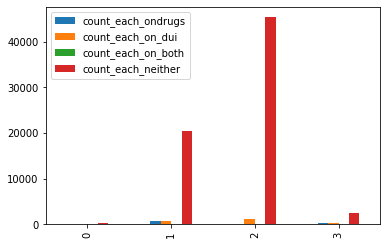

In [236]:
plot_df = table_final.toPandas()

plot_df.plot(kind="bar")          ### plot bar graph

#####  Quetion 2.4   

###### 2.4.1       Dataframe operation 

In [121]:
%%time


join_frame.select(concat(col("Year"),lit("-"),col("Month"),lit("-"),col("Day").alias("Date_And_Time")),'Sex','Age','Licence Type','No Of Cas').filter(join_frame['Suburb'] == "ADELAIDE").show()



+-------------------------------------------------+-------+----+------------+---------+
|concat(Year, -, Month, -, Day AS `Date_And_Time`)|    Sex| Age|Licence Type|No Of Cas|
+-------------------------------------------------+-------+----+------------+---------+
|                             2016-November-Wed...|   Male| 056|        Full|        0|
|                             2016-November-Wed...|   Male| 072|        null|        1|
|                             2016-November-Tue...|   Male| 056|        null|        0|
|                             2016-November-Tue...| Female| 027|        null|        1|
|                             2016-November-Tue...| Female| 032|        Full|        0|
|                             2016-November-Tue...|Unknown| XXX|     Unknown|        0|
|                             2016-November-Tue...|   Male| 022|     Unknown|        0|
|                             2016-November-Tue...|   Male| 020|     Unknown|        0|
|                             20

######   Rdd operation

In [122]:
%%time













CPU times: user 4.93 ms, sys: 0 ns, total: 4.93 ms
Wall time: 559 ms


##### Spark SQL

In [138]:
%%time



d_new_units = d_frame_crash.withColumnRenamed("Licence Type","Licence_Type")\
.withColumnRenamed("No Of Cas","No_Of_Casualties")


d_frame_crash.createOrReplaceTempView("df_crash_sql")
d_new_units.createOrReplaceTempView("df_units_sql")




query_sql = spark.sql(''' SELECT CONCAT(cr.Year, '-',cr.Month ,'-',cr.Day) AS Date, cr.Time ,un.Sex , un.Age , un.Licence_Type, un.No_Of_Casualties
                         FROM df_crash_sql cr JOIN df_units_sql un
                         ON cr.REPORT_ID = un.REPORT_ID
                         Where cr.Suburb = "ADELAIDE"
                         ''')
query_sql.show()

+--------------------+--------+-------+----+------------+----------------+
|                Date|    Time|    Sex| Age|Licence_Type|No_Of_Casualties|
+--------------------+--------+-------+----+------------+----------------+
|2016-November-Wed...|01:45 pm|   Male| 056|        Full|               0|
|2016-November-Wed...|01:45 pm|   Male| 072|        null|               1|
|2016-November-Tue...|03:40 pm|   Male| 056|        null|               0|
|2016-November-Tue...|03:40 pm| Female| 027|        null|               1|
|2016-November-Tue...|05:00 pm| Female| 032|        Full|               0|
|2016-November-Tue...|05:00 pm|Unknown| XXX|     Unknown|               0|
|2016-November-Tue...|05:40 pm|   Male| 022|     Unknown|               0|
|2016-November-Tue...|05:40 pm|   Male| 020|     Unknown|               0|
|2016-November-Monday|11:26 pm|Unknown| XXX|     Unknown|               0|
|2016-November-Monday|11:26 pm|   Male| 042|        Full|               0|
|2016-November-Monday|11:

###### 2.4.2      Dataframe operation  

In [139]:
%%time



join_frame.select('Suburb','Total Cas').filter(join_frame['Licence Type'] == "Unlicenced").groupby('Suburb').agg(F.count('Total Cas')).show()

+-------------------+----------------+
|             Suburb|count(Total Cas)|
+-------------------+----------------+
|      FLINDERS PARK|              11|
|       POOGINAGORIC|               1|
|     TEA TREE GULLY|               1|
|            HACKHAM|               4|
|   MEDINDIE GARDENS|               1|
|           WISANGER|               1|
|            CUMMINS|               1|
|       BASKET RANGE|               1|
|MURRAY BRIDGE SOUTH|               1|
|      GILLES PLAINS|               6|
|             HAWKER|               1|
|           BEAUFORT|               1|
|             MAGILL|               5|
|            ECHUNGA|               1|
|            CULTANA|               1|
|        EDWARDSTOWN|              12|
|        RISDON PARK|               2|
|          THORNGATE|               2|
|       ANDREWS FARM|              12|
|       TORRENSVILLE|              12|
+-------------------+----------------+
only showing top 20 rows

CPU times: user 14.8 ms, sys: 0 ns, to

In [150]:
%%time

new_crash = d_frame_crash.withColumnRenamed("Total Cas","Total_no_of_casualities")
new_units = d_frame_units.withColumnRenamed("Licence Type","Licence_Type")



new_crash.createOrReplaceTempView("crash_sql")
new_units.createOrReplaceTempView("units_sql")



query_sql = spark.sql(''' SELECT COUNT(cr.Total_no_of_casualities), cr.Suburb
                          FROM crash_sql cr JOIN units_sql un
                          ON cr.REPORT_ID = un.REPORT_ID
                          Where un.Licence_Type = "Unlicenced"
                          GROUP BY cr.Suburb
                         ''')
query_sql.show()



+------------------------------+-------------------+
|count(Total_no_of_casualities)|             Suburb|
+------------------------------+-------------------+
|                            11|      FLINDERS PARK|
|                             1|       POOGINAGORIC|
|                             1|     TEA TREE GULLY|
|                             4|            HACKHAM|
|                             1|   MEDINDIE GARDENS|
|                             1|           WISANGER|
|                             1|            CUMMINS|
|                             1|       BASKET RANGE|
|                             1|MURRAY BRIDGE SOUTH|
|                             6|      GILLES PLAINS|
|                             1|             HAWKER|
|                             1|           BEAUFORT|
|                             5|             MAGILL|
|                             1|            ECHUNGA|
|                             1|            CULTANA|
|                            12|        EDWARD